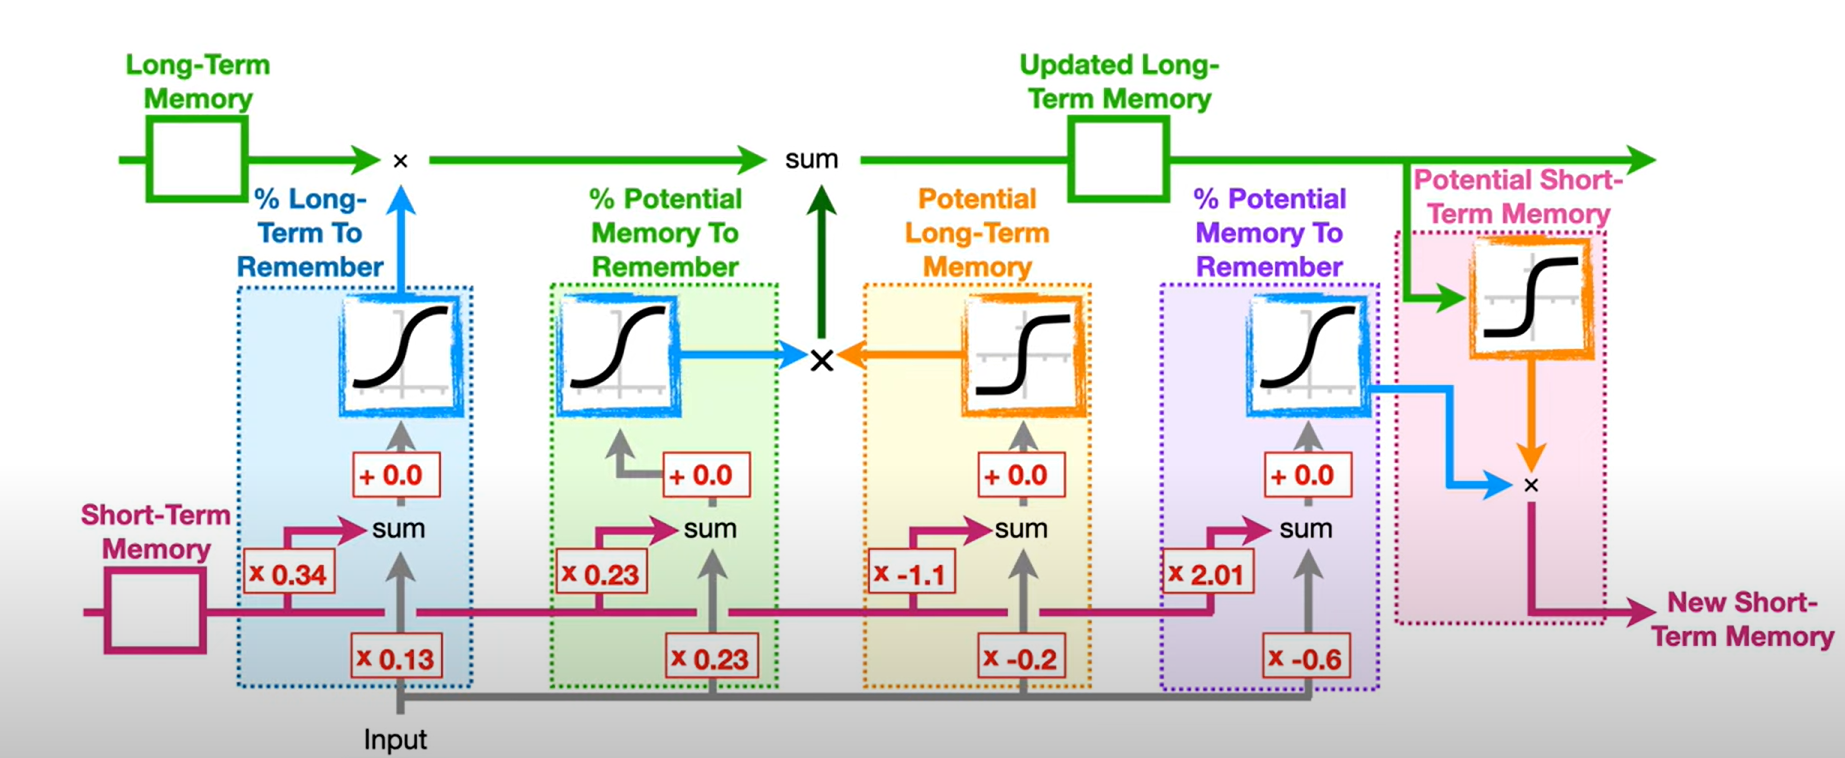

# LSTM Model

In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'+

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [55]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        mean = torch.tensor(0.0)
        std = torch.tensor(1.0)
        self.wlr1= nn.Parameter(torch.normal(mean= mean, std= std), requires_grad= True)
        self.wlr2= nn.Parameter(torch.normal(mean= mean, std= std), requires_grad= True)
        self.blr1= nn.Parameter(torch.normal(mean= mean, std= std), requires_grad= True)

        self.wpr1= nn.Parameter(torch.normal(mean= mean, std= std), requires_grad= True)
        self.wpr2= nn.Parameter(torch.normal(mean= mean, std= std), requires_grad= True)
        self.bpr1= nn.Parameter(torch.normal(mean= mean, std= std), requires_grad= True)

        self.wp1= nn.Parameter(torch.normal(mean= mean, std= std), requires_grad= True)
        self.wp2= nn.Parameter(torch.normal(mean= mean, std= std), requires_grad= True)
        self.bp1= nn.Parameter(torch.normal(mean= mean, std= std), requires_grad= True)
       
        self.ws1= nn.Parameter(torch.normal(mean= mean, std= std), requires_grad= True)
        self.ws2= nn.Parameter(torch.normal(mean= mean, std= std), requires_grad= True)
        self.bs1= nn.Parameter(torch.normal(mean= mean, std= std), requires_grad= True)

    def lstm_unit(self, x, long_mem, short_mem):
        long_memory_to_rem= F.sigmoid((x * self.wlr2)+ 
                                      (short_mem * self.wlr1))

        potentialLong_memory_to_rem= F.sigmoid((x * self.wpr2)+ 
                                               (short_mem * self.wpr1))
        
        potential_long_memory= F.tanh((x * self.wp2)+ 
                                      (short_mem * self.wp1))

        potentialShort_memory_to_rem= F.sigmoid((x * self.ws2)+ 
                                                (short_mem * self.ws1))

        new_long_memory= long_mem * long_memory_to_rem

        new_long_memory= new_long_memory + (potentialLong_memory_to_rem * potential_long_memory)

        new_short_memory= F.tanh(new_long_memory) * potentialShort_memory_to_rem

        return ([new_long_memory, new_short_memory])
    
    def forward(self, x):
        long_mem= 0
        short_mem = 0
        outs= []
        for i in x:
            for j in i:
                long_mem, short_mem = self.lstm_unit(j, long_mem= long_mem, short_mem= short_mem)
            outs.append(short_mem)
        return outs



In [71]:
model = LSTM()
optimizer= optim.Adam(model.parameters(), lr= 0.01)
criterion = nn.MSELoss()

datac1= torch.tensor([0, 0.5 , 0.3, 1 , 0 ])
datac2= torch.tensor([1, 0.5 , 0.3, 1 , 1 ])
labels= torch.tensor([0, 1])


In [72]:
#Before training
outs= model([datac1,datac2])
print('Stocks of Company 1 on Day 5= ', outs[0].item())
print('Stocks of Company 2 on Day 5= ', outs[1].item())

Stocks of Company 1 on Day 5=  -0.09261829406023026
Stocks of Company 2 on Day 5=  -0.15017998218536377


In [73]:
Loss=[]
epochs= 2000
for epoch in range(epochs):
    outs = model([datac1, datac2])

    predictions = torch.stack(outs)

    # Cast labels to Float type
    labels = labels.float()

    loss = criterion(predictions, labels)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    Loss.append(loss.item())


Epoch [1/2000], Loss: 0.6657
Epoch [101/2000], Loss: 0.4997
Epoch [201/2000], Loss: 0.3757
Epoch [301/2000], Loss: 0.0514
Epoch [401/2000], Loss: 0.0339
Epoch [501/2000], Loss: 0.0251
Epoch [601/2000], Loss: 0.0156
Epoch [701/2000], Loss: 0.0083
Epoch [801/2000], Loss: 0.0051
Epoch [901/2000], Loss: 0.0035
Epoch [1001/2000], Loss: 0.0026
Epoch [1101/2000], Loss: 0.0021
Epoch [1201/2000], Loss: 0.0017
Epoch [1301/2000], Loss: 0.0014
Epoch [1401/2000], Loss: 0.0012
Epoch [1501/2000], Loss: 0.0010
Epoch [1601/2000], Loss: 0.0009
Epoch [1701/2000], Loss: 0.0008
Epoch [1801/2000], Loss: 0.0007
Epoch [1901/2000], Loss: 0.0007


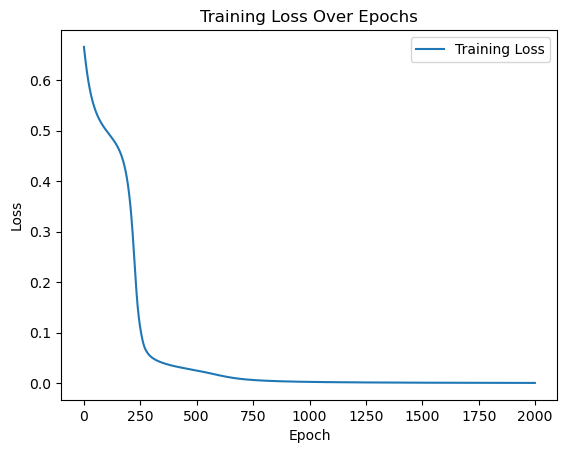

In [74]:
import matplotlib.pyplot as plt

plt.plot(Loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


In [75]:
#After training
with torch.no_grad():

    outs= model([datac1,datac2])
print('Stocks of Company 1 on Day 5= ', outs[0].item())
print('Stocks of Company 2 on Day 5= ', outs[1].item())

Stocks of Company 1 on Day 5=  0.02780483104288578
Stocks of Company 2 on Day 5=  0.9797720313072205


In [8]:
class pytorchLSTM(nn.Module):
    def __init__(self):
        super(pytorchLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=10, num_layers=1, batch_first=True)
        self.fc = nn.Linear(10, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x.unsqueeze(-1))
        output = self.fc(lstm_out[:, -1, :])
        return output


In [9]:
model = pytorchLSTM()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()


In [10]:
datac1 = torch.tensor([0, 0.5, 0.3, 1, 0]).view(1, -1)
datac2 = torch.tensor([1, 0.5, 0.3, 1, 1]).view(1, -1)
labels = torch.tensor([0, 1]).float()


In [11]:
torch.tensor([0, 0.5, 0.3, 1, 0]).view(1, -1)

tensor([[0.0000, 0.5000, 0.3000, 1.0000, 0.0000]])

In [12]:
epochs = 500
Loss=[]
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    output1 = model(datac1.float())
    output2 = model(datac2.float())

    loss = criterion(output1.squeeze(), labels[0]) + criterion(output2.squeeze(), labels[1])
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    Loss.append(loss.item())


Epoch [1/500], Loss: 1.4931
Epoch [51/500], Loss: 0.8181
Epoch [101/500], Loss: 0.3990
Epoch [151/500], Loss: 0.3357
Epoch [201/500], Loss: 0.2492
Epoch [251/500], Loss: 0.1022
Epoch [301/500], Loss: 0.0003
Epoch [351/500], Loss: 0.0000
Epoch [401/500], Loss: 0.0000
Epoch [451/500], Loss: 0.0000


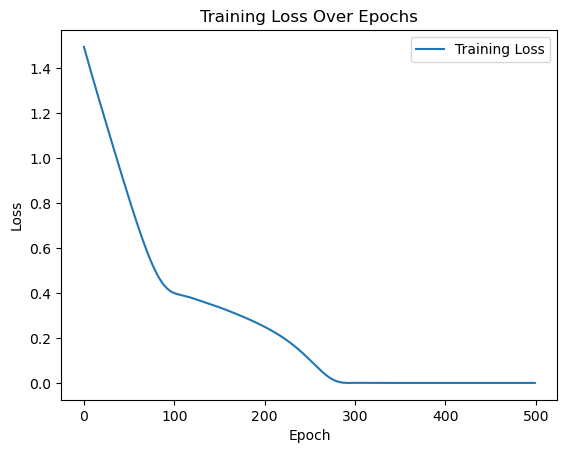

In [13]:
import matplotlib.pyplot as plt

plt.plot(Loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


In [22]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


training_data = [
    # Tags are: DET - determiner; NN - noun; V - verb
    # For example, the word "The" is a determiner
    ("The dog ate the apple".split(), ["DET", "NN", "V", "DET", "NN"]),
    ("Everybody read that book".split(), ["NN", "V", "DET", "NN"])
]
word_to_ix = {}
# For each words-list (sentence) and tags-list in each tuple of training_data
for sent, tags in training_data:
    for word in sent:
        if word not in word_to_ix:  # word has not been assigned an index yet
            word_to_ix[word] = len(word_to_ix)  # Assign each word with a unique index
print(word_to_ix)
tag_to_ix = {"DET": 0, "NN": 1, "V": 2}  # Assign each tag with a unique index
ix_to_tag = {0: "DET", 1: "NN", 2: "V"}
# These will usually be more like 32 or 64 dimensional.
# We will keep them small, so we can see how the weights change as we train.
EMBEDDING_DIM = 6
HIDDEN_DIM = 6

{'The': 0, 'dog': 1, 'ate': 2, 'the': 3, 'apple': 4, 'Everybody': 5, 'read': 6, 'that': 7, 'book': 8}


In [14]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim,bidirectional=True)
        
        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim *2, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [18]:
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(tag_to_ix))
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
# Here we don't need to train, so the code is wrapped in torch.no_grad()
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)
    print(torch.argmax( tag_scores, axis= 1))

for epoch in range(300):  # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_sequence(tags, tag_to_ix)

        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)

        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

# See what the scores are after training
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)

    # The sentence is "the dog ate the apple".  i,j corresponds to score for tag j
    # for word i. The predicted tag is the maximum scoring tag.
    # Here, we can see the predicted sequence below is 0 1 2 0 1
    # since 0 is index of the maximum value of row 1,
    # 1 is the index of maximum value of row 2, etc.
    # Which is DET NOUN VERB DET NOUN, the correct sequence!
    print(torch.argmax( tag_scores, axis= 1))

tensor([1, 0, 0, 0, 0])
tensor([0, 1, 2, 0, 1])


In [19]:
training_data[0][0]

['The', 'dog', 'ate', 'the', 'apple']

In [33]:
#actual
training_data[0][1]

['DET', 'NN', 'V', 'DET', 'NN']

In [32]:
#Predication
tags_mapped = [ix_to_tag[number.item()] for number in torch.argmax( tag_scores, axis= 1)]
tags_mapped

['DET', 'NN', 'V', 'DET', 'NN']